# 가설 1-1 : 신규 고객의 유입을 늘리면 매출 향상에 영향을 줄 것이다. 

- 월별 분석 2020/1/1
    - 2019/1/1 가입기간 12이상인 사람 : 기존 고객, 12인 사람 : 신규 고객
    - 데이터가 정확하지 않아서 월별 분석이 어려움
    - 코호트 분석으로 시도


- 잠재 혹은 잠재 이탈 고객을 대상으로 가설을 바꾸면 좀 의미있는 분석이 될 수 있을까?

# 가설 1-2 : 고객의 재구매율을 높인다면 매출 향상에 영향을 줄 것이다.

# 데이터 확인

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import datetime as dt

In [105]:
customer_df = pd.read_csv('C:/Users/hakju/OneDrive/바탕 화면/study/FIRST_PROJECT/archive/Customers_Data.csv')
discount_coupon_df = pd.read_csv('C:/Users/hakju/OneDrive/바탕 화면/study/FIRST_PROJECT/archive/Discount_Coupon.csv')
marketing_spend_df = pd.read_csv('C:/Users/hakju/OneDrive/바탕 화면/study/FIRST_PROJECT/archive/Marketing_Spend.csv')
online_sales_df = pd.read_csv('C:/Users/hakju/OneDrive/바탕 화면/study/FIRST_PROJECT/temp/Online_Sales_edit.csv')
tax_amount_df = pd.read_csv('C:/Users/hakju/OneDrive/바탕 화면/study/FIRST_PROJECT/archive/Tax_Amount.csv')

# online_sales_df + discount_coupon_df
Monetary_df = pd.read_csv('C:/Users/hakju/OneDrive/바탕 화면/study/FIRST_PROJECT/temp/Monetary.csv')

In [106]:
customer_df.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


# 데이터 가공

## 각 주문별 매출액 계산

In [107]:
Monetary_df.head(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_Category_x,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,Nest-USA,1,153.71,6.5,Used,ELEC10,10.0
1,17850,16680,2019-01-01,Nest-USA,1,153.71,6.5,Used,ELEC10,10.0
2,17850,16681,2019-01-01,Office,1,2.05,6.5,Used,OFF10,10.0


In [108]:
# date 형식 변경
Monetary_df['Transaction_Date'] = pd.to_datetime(Monetary_df['Transaction_Date'], format='%Y-%m-%d')

Monetary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          52924 non-null  int64         
 1   Transaction_ID      52924 non-null  int64         
 2   Transaction_Date    52924 non-null  datetime64[ns]
 3   Product_Category_x  52924 non-null  object        
 4   Quantity            52924 non-null  int64         
 5   Avg_Price           52924 non-null  float64       
 6   Delivery_Charges    52924 non-null  float64       
 7   Coupon_Status       52924 non-null  object        
 8   Coupon_Code         52524 non-null  object        
 9   Discount_pct        52524 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 4.0+ MB


In [109]:
Monetary_df = Monetary_df.rename(columns={'Product_Category_x': 'Product_Category'})
Monetary_df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_Category',
       'Quantity', 'Avg_Price', 'Delivery_Charges', 'Coupon_Status',
       'Coupon_Code', 'Discount_pct'],
      dtype='object')

In [110]:
# GST int형으로 형변환
tax_amount_df['GST_numeric'] = tax_amount_df['GST'].str.strip('%').astype('int') / 100

In [111]:
display(tax_amount_df.info())
display(tax_amount_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     object 
 2   GST_numeric       20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 608.0+ bytes


None

,Product_Category,GST,GST_numeric
0,Nest-USA,10%,0.10
1,Office,10%,0.10
2,Apparel,18%,0.18


In [112]:
sales_df = pd.merge(left=Monetary_df, right=tax_amount_df, how='left', on='Product_Category')
sales_df.head(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct,GST,GST_numeric
0,17850,16679,2019-01-01,Nest-USA,1,153.71,6.5,Used,ELEC10,10.0,10%,0.1
1,17850,16680,2019-01-01,Nest-USA,1,153.71,6.5,Used,ELEC10,10.0,10%,0.1
2,17850,16681,2019-01-01,Office,1,2.05,6.5,Used,OFF10,10.0,10%,0.1


In [113]:
sales_df.isna().sum()

CustomerID            0
Transaction_ID        0
Transaction_Date      0
Product_Category      0
Quantity              0
Avg_Price             0
Delivery_Charges      0
Coupon_Status         0
Coupon_Code         400
Discount_pct        400
GST                   0
GST_numeric           0
dtype: int64

In [114]:
sales_df[['Coupon_Code', 'Discount_pct']] = sales_df[['Coupon_Code', 'Discount_pct']].fillna(0)

In [115]:
sales_df

,CustomerID,Transaction_ID,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct,GST,GST_numeric
0,17850,16679,2019-01-01,Nest-USA,1,153.71,6.50,Used,ELEC10,10.0,10%,0.10
1,17850,16680,2019-01-01,Nest-USA,1,153.71,6.50,Used,ELEC10,10.0,10%,0.10
2,17850,16681,2019-01-01,Office,1,2.05,6.50,Used,OFF10,10.0,10%,0.10
3,17850,16682,2019-01-01,Apparel,5,17.53,6.50,Not Used,SALE10,10.0,18%,0.18
4,17850,16682,2019-01-01,Bags,1,16.50,6.50,Used,AIO10,10.0,18%,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,Nest-USA,1,121.30,6.50,Clicked,ELEC30,30.0,10%,0.10
52920,14410,48494,2019-12-31,Apparel,1,48.92,6.50,Used,SALE30,30.0,18%,0.18
52921,14410,48495,2019-12-31,Nest-USA,1,151.88,6.50,Used,ELEC30,30.0,10%,0.10
52922,14600,48496,2019-12-31,Nest-USA,5,80.52,6.50,Clicked,ELEC30,30.0,10%,0.10


In [116]:
# 매출액 = 평균가 * (1-GST) * 판매량 * (1-할인률) + 배송비
def get_sales(Avg_Price, GST_numeric, Quantity, Discount_pct, Delivery_Charges, Coupon_Status) :
    if Coupon_Status == 'Used' :
        sale = Avg_Price * (1-GST_numeric) * Quantity * (1-(Discount_pct/100)) + Delivery_Charges
        return sale
    else :
        sale = Avg_Price * (1-GST_numeric) * Quantity + Delivery_Charges
        return sale

In [117]:
sales_df['sales'] = sales_df[['Avg_Price', 'GST_numeric', 'Quantity', 'Discount_pct', 'Delivery_Charges', 'Coupon_Status']].apply(lambda x: get_sales(*x), axis=1).round(2)
sales_df.head(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct,GST,GST_numeric,sales
0,17850,16679,2019-01-01,Nest-USA,1,153.71,6.5,Used,ELEC10,10.0,10%,0.1,131.01
1,17850,16680,2019-01-01,Nest-USA,1,153.71,6.5,Used,ELEC10,10.0,10%,0.1,131.01
2,17850,16681,2019-01-01,Office,1,2.05,6.5,Used,OFF10,10.0,10%,0.1,8.16


In [118]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        52924 non-null  int64         
 1   Transaction_ID    52924 non-null  int64         
 2   Transaction_Date  52924 non-null  datetime64[ns]
 3   Product_Category  52924 non-null  object        
 4   Quantity          52924 non-null  int64         
 5   Avg_Price         52924 non-null  float64       
 6   Delivery_Charges  52924 non-null  float64       
 7   Coupon_Status     52924 non-null  object        
 8   Coupon_Code       52924 non-null  object        
 9   Discount_pct      52924 non-null  float64       
 10  GST               52924 non-null  object        
 11  GST_numeric       52924 non-null  float64       
 12  sales             52924 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 5.2+ MB


In [119]:
cohort_sales_df = sales_df[['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_Category', 'sales']]
cohort_sales_df.head(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_Category,sales
0,17850,16679,2019-01-01,Nest-USA,131.01
1,17850,16680,2019-01-01,Nest-USA,131.01
2,17850,16681,2019-01-01,Office,8.16


## 날짜 형식 변경 (월별)

In [120]:
# 각 고객별 첫 구매일자 구하기
First_order = cohort_sales_df.groupby('CustomerID')['Transaction_Date'].min()

# First_order 합치기 위해 chort df index 임시 변경
cohort_sales_df = cohort_sales_df.set_index('CustomerID')

cohort_sales_df['First_order'] = First_order

# index 초기화
cohort_sales_df = cohort_sales_df.reset_index()

In [121]:
cohort_sales_df.sample(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_Category,sales,First_order
25164,12721,32005,2019-07-06,Office,122.90,2019-04-12
19744,12370,28976,2019-05-26,Apparel,30.92,2019-05-26
29119,15719,33946,2019-07-28,Apparel,13.52,2019-07-27


In [122]:
def get_date(date) :
    new_date = dt.datetime.strftime(date, '%Y-%m')
    return new_date

In [123]:
cohort_sales_df['First_order'] = cohort_sales_df['First_order'].map(get_date)
cohort_sales_df['Order_date'] = cohort_sales_df['Transaction_Date'].map(get_date)

In [124]:
cohort_sales_df.head(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_Category,sales,First_order,Order_date
0,17850,16679,2019-01-01,Nest-USA,131.01,2019-01,2019-01
1,17850,16680,2019-01-01,Nest-USA,131.01,2019-01,2019-01
2,17850,16681,2019-01-01,Office,8.16,2019-01,2019-01


# 코호트 분석

## 코호트 분석을 위한 데이터 만들기

### 주기별 구매 고객 및 매출액 계산

In [125]:
# 주기 별 구매 고객 수 계산
cohort_sales_df1 = cohort_sales_df.groupby(['First_order', 'Order_date'])['CustomerID'].nunique()
cohort_sales_df1 = cohort_sales_df1.reset_index()

cohort_sales_df1 = cohort_sales_df1.rename(columns={'CustomerID' : 'Total_User'})

In [126]:
# 주기 별 매출액 계산
cohort_sales_df2 = cohort_sales_df.groupby(['First_order', 'Order_date'])['sales'].sum()
cohort_sales_df2 = cohort_sales_df2.reset_index()

In [127]:
cohort_sales_df = pd.merge(cohort_sales_df1, cohort_sales_df2, on=['First_order', 'Order_date'])
cohort_sales_df

,First_order,Order_date,Total_User,sales
0,2019-01,2019-01,215,405700.36
1,2019-01,2019-02,13,38185.04
2,2019-01,2019-03,24,49123.19
3,2019-01,2019-04,34,104446.02
4,2019-01,2019-05,23,29435.62
...,...,...,...,...
73,2019-10,2019-11,6,9009.75
74,2019-10,2019-12,4,2507.06
75,2019-11,2019-11,68,197677.25
76,2019-11,2019-12,7,4252.89


In [128]:
# 월 차이 계산 함수
def get_period(order_date, first_order_date) :
    order_date = int(order_date[5:])
    first_order_date = int(first_order_date[5:])
    
    period = order_date - first_order_date
    return period

In [129]:
cohort_sales_df['Cohort_Period'] = cohort_sales_df[['Order_date', 'First_order']].apply(lambda x : get_period(*x), axis=1)

cohort_sales_df.sample(3)

,First_order,Order_date,Total_User,sales,Cohort_Period
42,2019-05,2019-05,112,188137.95,0
48,2019-05,2019-11,14,34049.42,6
3,2019-01,2019-04,34,104446.02,3


## 코호트 분석

### 주기 별 재주문 코호트 분석 결과

In [130]:
co_reorder = cohort_sales_df.set_index(['First_order', 'Cohort_Period'])
co_reorder = co_reorder['Total_User'].unstack(1)
reorder = co_reorder.div(co_reorder[0], axis=0)

reorder

Cohort_Period,0,1,2,3,4,5,6,7,8,9,10,11
First_order,,,,,,,,,,,,
2019-01,1.0,0.060465,0.111628,0.158140,0.106977,0.204651,0.162791,0.218605,0.106977,0.130233,0.093023,0.15814
2019-02,1.0,0.072917,0.093750,0.166667,0.177083,0.229167,0.197917,0.156250,0.125000,0.114583,0.166667,NaN
2019-03,1.0,0.101695,0.197740,0.141243,0.180791,0.186441,0.124294,0.124294,0.084746,0.107345,NaN,NaN
2019-04,1.0,0.085890,0.147239,0.147239,0.110429,0.092025,0.061350,0.098160,0.073620,NaN,NaN,NaN
2019-05,1.0,0.107143,0.080357,0.116071,0.089286,0.116071,0.125000,0.071429,NaN,NaN,NaN,NaN
2019-06,1.0,0.145985,0.160584,0.087591,0.080292,0.102190,0.080292,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.138298,0.042553,0.063830,0.117021,0.095745,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.103704,0.111111,0.074074,0.059259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.076923,0.038462,0.025641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


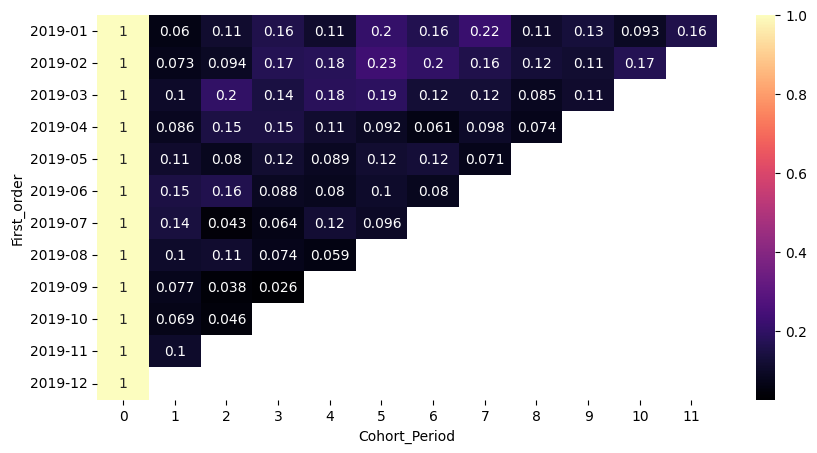

In [131]:
order_heatmap = sns.heatmap(data=reorder, annot=True, cmap='magma')
order_heatmap.figure.set_size_inches(10,5)

# 'viridis': 녹색으로 시작하여 노란색으로 끝나는 색상 맵
# 'plasma': 자홍색으로 시작하여 분홍색으로 끝나는 색상 맵
# 'coolwarm': 파란색에서 붉은색까지 변하는 색상 맵
# 'magma': 검정에서 붉은색까지 변하는 색상 맵

In [132]:
# print(reorder.index, reorder.columns)
reorder.loc[reorder.index[0]]
# reorder.columns
# sns.lineplot(data=reorder.loc[reorder.index[0]])

Cohort_Period
0     1.000000
1     0.060465
2     0.111628
3     0.158140
4     0.106977
5     0.204651
6     0.162791
7     0.218605
8     0.106977
9     0.130233
10    0.093023
11    0.158140
Name: 2019-01, dtype: float64

### 주기별 매출액 코호트 분석 결과

In [133]:
co_sales = cohort_sales_df.set_index(['First_order', 'Cohort_Period'])
co_sales = co_sales['sales'].unstack(1)

co_sales

Cohort_Period,0,1,2,3,4,5,6,7,8,9,10,11
First_order,,,,,,,,,,,,
2019-01,405700.36,38185.04,49123.19,104446.02,29435.62,47126.92,80496.67,49605.13,37544.54,44711.43,36828.83,81315.57
2019-02,267878.14,7878.47,12390.95,21376.08,21605.98,41261.39,23462.37,40166.42,16374.28,26295.47,43040.94,NaN
2019-03,280721.81,38931.22,34260.02,26691.68,46507.44,66596.00,42213.05,38410.14,22733.85,32611.04,NaN,NaN
2019-04,226051.87,21734.88,14834.92,29327.72,24085.82,27031.99,15431.56,51972.70,16582.18,NaN,NaN,NaN
2019-05,188137.95,6088.13,12215.56,14746.75,14965.88,35725.29,34049.42,10107.06,NaN,NaN,NaN,NaN
2019-06,175503.36,10816.39,12635.93,14743.15,9872.83,33913.15,13966.50,NaN,NaN,NaN,NaN,NaN
2019-07,146195.38,14111.50,6679.66,14105.80,22047.10,25162.33,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,187359.59,9600.07,10717.31,26430.77,15234.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,133675.01,1673.37,2349.17,644.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


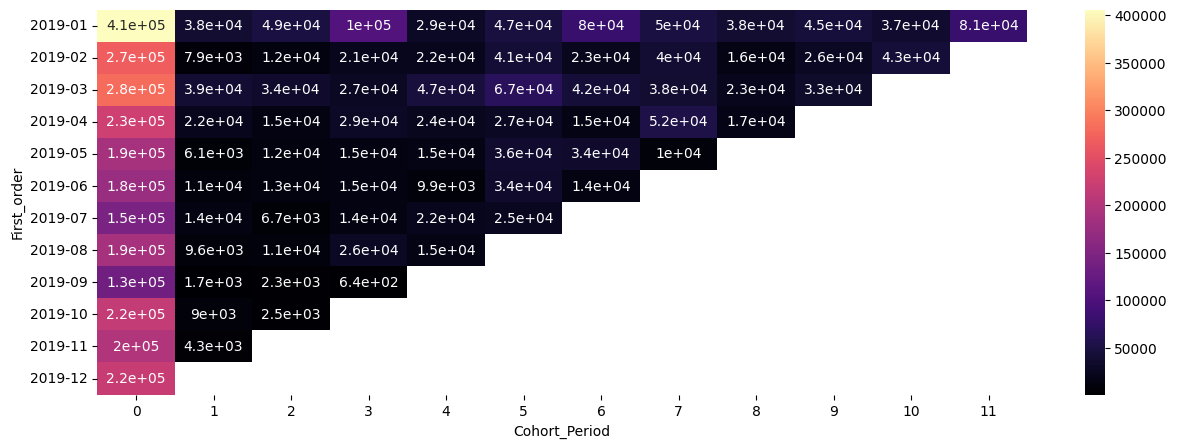

In [134]:
sales_heatmap = sns.heatmap(co_sales, annot=True, cmap='magma')
sales_heatmap = sales_heatmap.figure.set_size_inches(15, 5)

In [135]:
reorder.loc[reorder.index[0]].index

# co_sales.loc[co_sales.index[0]]

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64', name='Cohort_Period')

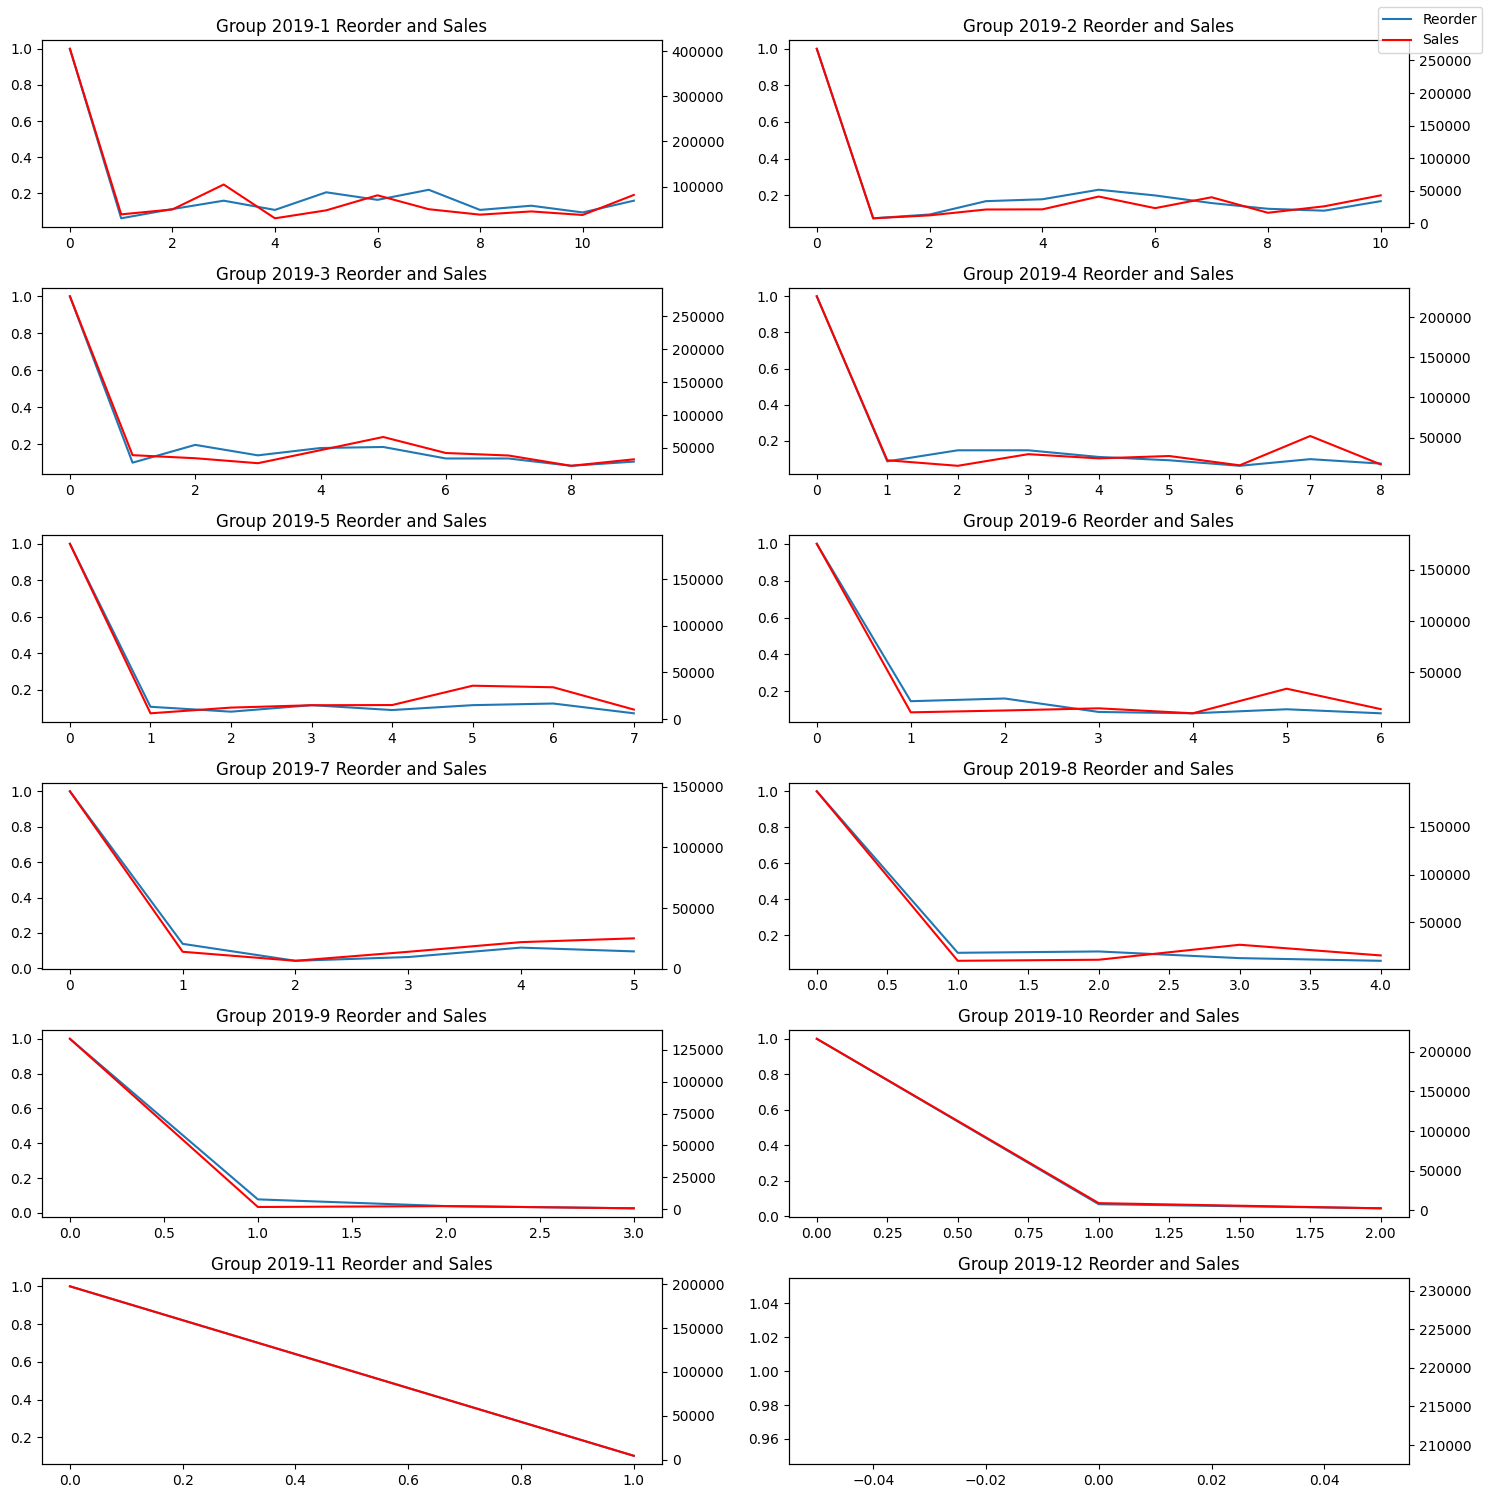

In [136]:
# 첫구매 그룹 별 재주문율과 매출액 비교 그래프
fig, axes = plt.subplots(6,2, figsize=(15,15))

column = 0
for i in range(12) :
    row = i // 2
    if column == 0 :
        ax1 = axes[row,0]
        ax1.set_title('Group 2019-' + str(i+1) + ' Reorder and Sales')
        ax1.plot(reorder.loc[reorder.index[i]].index, reorder.loc[reorder.index[i]].values, label='Reorder')
        
        ax2 = ax1.twinx()
        ax2.plot(co_sales.loc[co_sales.index[i]].index, co_sales.loc[co_sales.index[i]].values, label='Sales', color='r')
        
        column += 1
    else :
        ax1 = axes[row,1]
        ax1.set_title('Group 2019-' + str(i+1) + ' Reorder and Sales')
        ax1.plot(reorder.loc[reorder.index[i]].index, reorder.loc[reorder.index[i]].values, label='Reorder')
        
        ax2 = ax1.twinx()
        ax2.plot(co_sales.loc[co_sales.index[i]].index, co_sales.loc[co_sales.index[i]].values, label='Sales', color='r')
        
        column = 0

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

handles = handles1 + handles2
labels = labels1 + labels2

fig.legend(handles, labels, loc='upper right')

fig.tight_layout()
plt.show()

## 결론
- 각 그룹을 확인했을때, 전반적으로 재구매율은 10~20% 사이에 있다.
- 재구매율이 늘어나면 매출액도 전반적으로 향상되는 경향이 있다.
- 즉, 재구매율을 높일 수 있는 마케팅을 진행한다면 매출액 향상에도 영향을 미칠 것이다.

- 재구매를 유도할 수 있는 푸시 알림, 쿠폰 이벤트 등을 기획하면 좋을 것 같다.